In [139]:
import pandas as pd
import numpy as np

### Loading the feature functions from CSV and trimming

In [140]:
df = pd.read_csv("../features/ff_valence.csv")

# Save to a CSV file
molecules = df['Mol'].values


molecules = molecules
molecules

array(['LiH', 'NaH', 'KH', 'RbH', 'CsH', 'CsCl', 'LiCl', 'CuI', 'LiF',
       'ZnS', 'CoO2', 'SnS2', 'LiCoO2', 'LiSnS2'], dtype=object)

### Size Modification and adding parameters to Data Frame

In [141]:
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,EA_A,EN_C,EN_A
0,LiH,164.10,4.51,133.0,32,6,6,5.3920,13.590,0.7540,0.618,0.98,2.200
1,NaH,162.70,4.51,155.0,32,6,6,5.1390,13.590,0.7540,0.548,0.93,2.200
2,KH,289.70,4.51,196.0,32,6,6,4.3410,13.590,0.7540,0.501,0.82,2.200
3,RbH,319.80,4.51,210.0,32,6,6,4.1770,13.590,0.7540,0.468,0.82,2.200
4,CsH,400.60,4.51,232.0,32,6,6,3.8490,13.590,0.7540,0.472,0.79,2.200
5,CsCl,400.60,14.60,232.0,99,8,8,3.8490,12.960,3.6170,0.472,0.79,3.160
6,LiCl,164.10,14.60,133.0,99,6,6,5.3920,12.960,3.6170,0.618,2.20,3.160
7,CuI,46.50,32.90,112.0,133,4,4,7.7260,10.451,3.0590,1.228,1.90,2.660
8,LiF,164.10,3.74,133.0,64,6,6,5.3920,17.423,3.3390,0.618,2.20,3.980
9,ZnS,38.67,19.40,118.0,103,4,4,9.3940,10.360,0.0000,2.077,1.65,2.580


In [142]:

%store -r res
res

[14.133308154469557,
 14.081369567351956,
 14.034265054162482,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 1.096295429346349,
 5.560246204451975,
 3.4399161501869044]

In [143]:
# drip first and 2nd row
# df = df.drop(index=[0,2], axis=1)
# res = res[1:2] + res[3:]
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,EA_A,EN_C,EN_A
0,LiH,164.10,4.51,133.0,32,6,6,5.3920,13.590,0.7540,0.618,0.98,2.200
1,NaH,162.70,4.51,155.0,32,6,6,5.1390,13.590,0.7540,0.548,0.93,2.200
2,KH,289.70,4.51,196.0,32,6,6,4.3410,13.590,0.7540,0.501,0.82,2.200
3,RbH,319.80,4.51,210.0,32,6,6,4.1770,13.590,0.7540,0.468,0.82,2.200
4,CsH,400.60,4.51,232.0,32,6,6,3.8490,13.590,0.7540,0.472,0.79,2.200
5,CsCl,400.60,14.60,232.0,99,8,8,3.8490,12.960,3.6170,0.472,0.79,3.160
6,LiCl,164.10,14.60,133.0,99,6,6,5.3920,12.960,3.6170,0.618,2.20,3.160
7,CuI,46.50,32.90,112.0,133,4,4,7.7260,10.451,3.0590,1.228,1.90,2.660
8,LiF,164.10,3.74,133.0,64,6,6,5.3920,17.423,3.3390,0.618,2.20,3.980
9,ZnS,38.67,19.40,118.0,103,4,4,9.3940,10.360,0.0000,2.077,1.65,2.580


In [144]:
# always inverse of EN_A
# val = df['EA_A']
# df['comb'] = 1/ df['EA_A']
# # df['comb'] = df['comb'] * df['Ion_C']
# df['comb'] = df['comb'] * df['CN_C']
# df['comb'] = df['comb'] * df['EN_C']
# df['comb'] = df['comb'] / df['Pol_A']

## always inverse of delta EN

## always inverse of pol_A ( anion polarisation)

## remove df['EA_A'] from the dataframe
df = df.drop(columns=['EA_A'])
# df = df.drop(columns=['Ion_C'])
# df = df.drop(columns=['Ion_A'])  
df = df.drop(columns=['CN_C'])
df = df.drop(columns=['Pol_A'])
df = df.drop(columns=['Pol_C'])
# df = df.drop(columns=['EN_C'])

# df = df.drop(columns=['Pol_A'])

res

[14.133308154469557,
 14.081369567351956,
 14.034265054162482,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 1.096295429346349,
 5.560246204451975,
 3.4399161501869044]

In [ ]:
# df = df.iloc[:10,0:]


## always inverse of EN_A

# df['Sum_EN'] = df['EN_C'] + df['EN_A']
# df['Diff_EN'] = abs(df['EN_A'] - df['EN_C'])
# # df['Diff_rad'] = df['RadV_A'] - df['RadV_C']


df['Sum_ion'] = df['Ion_C'] + df['Ion_A']
df['Sum_ion_cubed'] = df['Sum_ion']*df['Sum_ion']*df['Sum_ion']

df['Abs_diff_ion'] = abs(df['Ion_C'] - df['Ion_A'])
df['Abs_diff_ion_cubed'] = df['Abs_diff_ion']*df['Abs_diff_ion']*df['Abs_diff_ion']

df['Sum_EN'] = df['EN_A'] + df['EN_C']
df['Sum_EN_cubed'] = df['Sum_EN']*df['Sum_EN']*df['Sum_EN']

df['Abs_diff_EN'] = abs(df['EN_A'] - df['EN_C'])
df['Abs_diff_EN_cubed'] = df['Abs_diff_EN']*df['Abs_diff_EN']*df['Abs_diff_EN']
# df['Abs_diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])


# df['Sum_pol'] = df['Pol_C'] + df['Pol_A']
# df['Sum_pol_cubed'] = df['Sum_pol']*df['Sum_pol']*df['Sum_pol']

# df['Abs_diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])
# df['Abs_diff_pol_cubed'] = df['Abs_diff_pol']*df['Abs_diff_pol']*df['Abs_diff_pol']


# Adding sqrt values for each column
# for col in df.columns:
#     # Make sure the column is numeric before applying sqrt
#     if pd.api.types.is_numeric_dtype(df[col]):
#         # df[f'{col}_sqrt'] = np.sqrt(abs(df[col]))
#         # df[f'{col}_squared'] = np.square(df[col])
#         df.drop(columns=[col], inplace=True)

# df = df.drop(columns=['EN_C'])

# df['sum_ion'] = df['Ion_C'] + df['Ion_A']
# # df['diff_ion'] = df['Ion_C'] - df['Ion_A']
# df['diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])

df = df[['Sum_ion_cubed','Abs_diff_ion_cubed','Sum_EN_cubed','Abs_diff_EN_cubed','EN_C','EN_A','Ion_C','Ion_A']]

df.shape

(14, 8)

In [146]:
df

,Sum_ion,Abs_diff_ion,Sum_EN,Abs_diff_EN,EN_C,EN_A,Ion_C,Ion_A
0,18.9820,8.1980,3.180,1.220,0.98,2.200,5.3920,13.590
1,18.7290,8.4510,3.130,1.270,0.93,2.200,5.1390,13.590
2,17.9310,9.2490,3.020,1.380,0.82,2.200,4.3410,13.590
3,17.7670,9.4130,3.020,1.380,0.82,2.200,4.1770,13.590
4,17.4390,9.7410,2.990,1.410,0.79,2.200,3.8490,13.590
5,16.8090,9.1110,3.950,2.370,0.79,3.160,3.8490,12.960
6,18.3520,7.5680,5.360,0.960,2.20,3.160,5.3920,12.960
7,18.1770,2.7250,4.560,0.760,1.90,2.660,7.7260,10.451
8,22.8150,12.0310,6.180,1.780,2.20,3.980,5.3920,17.423
9,19.7540,0.9660,4.230,0.930,1.65,2.580,9.3940,10.360


### making the combinations

In [147]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

In [148]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names):
    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})

    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):

            subset_names = [combined_param_names[i] for i in subset_indices]

            # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue

            # Select the subset DataFrame
            subset = combined_params_df[subset_names]

            # Replace NaN values with 0
            subset = subset.fillna(0)

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results


In [149]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names, restricted_properties=None, restricted_to_inverses=None):
    if restricted_properties is None:
        restricted_properties = []
    if restricted_to_inverses is None:
        restricted_to_inverses = []

    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

     # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})
    
    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):
            subset_names = [combined_param_names[i] for i in subset_indices]

            # Replace NaN values with 0
             # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue
            
            subset = combined_params_df[subset_names]
            subset = subset.fillna(0)

            # Check if both a parameter and its inverse are in the subset
            invalid = False
           
            # Exclude subsets containing restricted inverses
            for restricted in restricted_properties:
                if f"{restricted}^(-1)" in subset_names:
                    invalid = True
                    break

            # Ensure restricted properties only appear as inverses
            for restricted in restricted_to_inverses:
                if restricted in subset_names or (restricted not in param_names and f"{restricted}^(-1)" not in subset_names):
                    invalid = True
                    break

            if invalid:
                continue

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))
            expr_str = " + ".join(subset_names)
            expr_val = subset.sum(axis=1)
            results.append((expr_str, expr_val))

    return results


In [150]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

def process_combinations_chunk(args):
    combined_params_df, combined_param_names, param_names, indices_chunk = args
    results = []

    for indices in indices_chunk:
        subset_names = [combined_param_names[i] for i in indices]
        subset = combined_params_df[subset_names]

        # Replace NaN values with 0
        subset = subset.fillna(0)

        # Check if both a parameter and its inverse are in the subset
        invalid = False
        for name in subset_names:
            if name.endswith("^(-1)") and name[:-5] in subset_names:
                invalid = True
                break
            elif name in param_names and f"{name}^(-1)" in subset_names:
                invalid = True
                break

        if not invalid:
            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results

def generate_combinations_df_parallel(params_df, param_names):
    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Generate all subsets of parameter indices
    all_combinations = [
        indices for r in range(1, len(combined_param_names) + 1)
        for indices in itertools.combinations(range(len(combined_param_names)), r)
    ]

    # Divide all_combinations into chunks
    num_workers = min(cpu_count(), len(all_combinations))
    chunk_size = max(1, len(all_combinations) // num_workers)
    chunks = [all_combinations[i:i + chunk_size] for i in range(0, len(all_combinations), chunk_size)]

    print(f"Using {num_workers} workers to process {len(all_combinations)} combinations in {len(chunks)} chunks")

    # Prepare arguments for parallel processing
    args = [
        (combined_params_df, combined_param_names, param_names, chunk)
        for chunk in chunks
    ]

    # Use multiprocessing to process combinations in parallel
    with Pool(processes=num_workers) as pool:
        results = pool.map(process_combinations_chunk, args)

    # Flatten results
    flattened_results = [item for sublist in results for item in sublist]
    return flattened_results


### Restricted parameters

In [151]:
# numeretor = ['Ion_C','Ion_A']
# denomeretor = ['Abs_diff_pol','Sum_pol','Abs_diff_EN','Sum_EN']
numeretor = None
denomeretor = None

In [152]:

import os
import pandas as pd

takeSaved = False

all_expressions = []
expressions = []
# Define file name to save/load the results
cache_file = "cached_expressions.pkl"

if os.path.exists(cache_file) and takeSaved:
    # Load the cached results if they exist
    expressions = pd.read_pickle(cache_file)
    all_expressions = list(expressions.itertuples(index=False, name=None))
    print("Loaded cached expressions.")
else:
    # Perform the costly computation if cache does not exist
    print("Calculating expressions...")
    param_names = list(df.columns)
    all_expressions = generate_combinations_df(df.iloc[:,], param_names, restricted_properties=numeretor, restricted_to_inverses=denomeretor)
    expressions = pd.DataFrame(all_expressions, columns=['Expression', 'Value'])

    # Save the results to cache
    expressions.to_pickle(cache_file)
    print("Expressions cached.")

# Print the shape of the expressions DataFrame
print(expressions.shape)


Calculating expressions...


/var/folders/zp/h52np6n918qd9v9139ls4z600000gn/T/ipykernel_2506/1368268208.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)


Expressions cached.
(13120, 2)


In [153]:
expressions['Value'] = expressions['Value'] 
expressions.head()

,Expression,Value
0,Sum_ion,0 18.9820 1 18.7290 2 17.9310 3 ...
1,Sum_ion,0 18.9820 1 18.7290 2 17.9310 3 ...
2,Abs_diff_ion,0 8.1980 1 8.4510 2 9.2490 3 ...
3,Abs_diff_ion,0 8.1980 1 8.4510 2 9.2490 3 ...
4,Sum_EN,0 3.180 1 3.130 2 3.020 3 3.02...


### Addition results to the combinations

In [154]:
values_dict = {expr_str: expr_val for expr_str, expr_val in all_expressions}
values = pd.DataFrame(values_dict)
values['res'] = res

### Finding Corelation

In [155]:

correlation = values.corr()

correlation.shape

(13105, 13105)

In [156]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:20])
top_vars = results.iloc[1:20].index

res                                                                                  1.000000
Sum_ion * Abs_diff_ion * Ion_C * Ion_A * Sum_EN^(-1) * EN_C^(-1) * EN_A^(-1)         0.956966
Abs_diff_ion * Ion_C * Ion_A * Sum_EN^(-1) * EN_A^(-1)                               0.951561
Abs_diff_ion * Ion_C * Ion_A * Sum_ion^(-1) * Sum_EN^(-1) * EN_A^(-1)                0.950985
Sum_ion * Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_C^(-1) * EN_A^(-1)                 0.949934
Abs_diff_ion * Ion_C * Ion_A * Sum_EN^(-1) * EN_C^(-1) * EN_A^(-1)                   0.945501
Sum_ion * Abs_diff_ion * Sum_EN^(-1) * EN_A^(-1)                                     0.940836
Sum_ion * Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_A^(-1)                             0.939646
Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_A^(-1)                                       0.939591
Sum_ion * Abs_diff_ion * Ion_C * EN_C^(-1) * EN_A^(-1)                               0.937027
Sum_ion * Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_C^(-1) * E

### Final Results

In [157]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:20])
top_vars = results.iloc[1:20].index


res                                                                                  1.000000
Sum_ion * Abs_diff_ion * Ion_C * Ion_A * Sum_EN^(-1) * EN_C^(-1) * EN_A^(-1)         0.956966
Abs_diff_ion * Ion_C * Ion_A * Sum_EN^(-1) * EN_A^(-1)                               0.951561
Abs_diff_ion * Ion_C * Ion_A * Sum_ion^(-1) * Sum_EN^(-1) * EN_A^(-1)                0.950985
Sum_ion * Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_C^(-1) * EN_A^(-1)                 0.949934
Abs_diff_ion * Ion_C * Ion_A * Sum_EN^(-1) * EN_C^(-1) * EN_A^(-1)                   0.945501
Sum_ion * Abs_diff_ion * Sum_EN^(-1) * EN_A^(-1)                                     0.940836
Sum_ion * Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_A^(-1)                             0.939646
Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_A^(-1)                                       0.939591
Sum_ion * Abs_diff_ion * Ion_C * EN_C^(-1) * EN_A^(-1)                               0.937027
Sum_ion * Abs_diff_ion * Ion_C * Sum_EN^(-1) * EN_C^(-1) * E

In [158]:
param = top_vars[0]

y = values[param]/1e3
x = values['res']

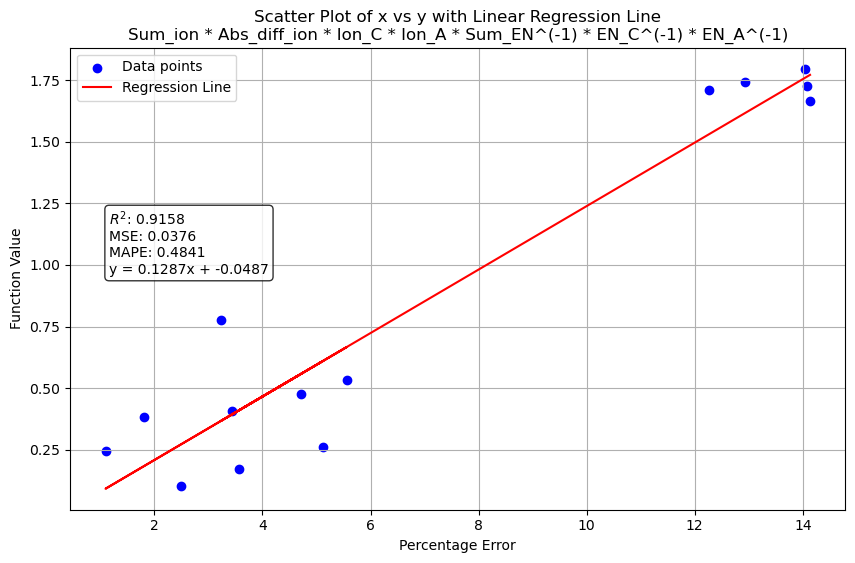

In [159]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Reshape x to a 2D array
x_reshaped = x.values.reshape(-1, 1)  # Convert x to a 2D array (n, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]  # model.coef_ gives the slope of the line
intercept = model.intercept_  # model.intercept_ gives the intercept

# Predict y values using the linear model
y_pred = model.predict(x_reshaped)

# Calculate R^2, MSE, and MAPE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)

# Display the equation of the line
equation = f"y = {slope:.4f}x + {intercept:.4f}"

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title(f'Scatter Plot of x vs y with Linear Regression Line\n{param}')
plt.xlabel('Percentage Error')
plt.ylabel('Function Value')
plt.grid()
plt.legend()

# Add text box with metrics
textstr = f"$R^2$: {r_squared:.4f}\nMSE: {mse:.4f} \nMAPE: {mape:.4f}\n{equation}"
plt.gca().text(0.05, 0.65, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.show()

### Results

1. Ion_C * EN_A * Sum_ion * Abs_diff_ion * Ion_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1) 